# Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
print(df.head())

      exam_1     exam_2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [4]:
def min_max_normalize(df, cols):
    
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

In [5]:
df_normalized = min_max_normalize(df, ['exam_1', 'exam_2'])
print(df_normalized.head())

     exam_1    exam_2  admitted
0  0.065428  0.694655         0
1  0.003266  0.194705         0
2  0.082968  0.619618         0
3  0.431764  0.816001         1
4  0.701943  0.655392         1


# Visualization

In [6]:
def plot_exam_scores(data):

    # 2 parts: admitted and not admitted
    admitted = data[data['admitted'] == 1]
    not_admitted = data[data['admitted'] == 0]
    plt.figure(figsize=(10, 6))
    
    # admitted students
    plt.scatter(admitted['exam_1'], admitted['exam_2'], color='green', label='Admitted', marker='o')

    # not admitted students
    plt.scatter(not_admitted['exam_1'], not_admitted['exam_2'], color='red', label='Not Admitted', marker='x')

    plt.xlabel('First Exam Scores')
    plt.ylabel('Second Exam Scores')
    plt.title('Scatter Plot of Exam Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

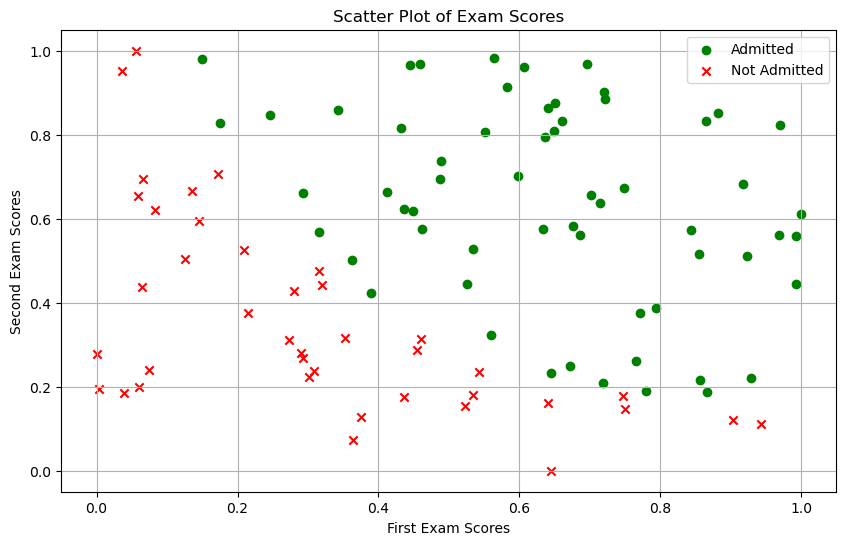

In [7]:
plot_exam_scores(df_normalized)

# Implementation of Logistic Regression

In [8]:
x = df.drop(['admitted'], axis=1)
y = df['admitted']

#convert x and y to numpy array
x = x.to_numpy()
y = y.to_numpy()

In [9]:
x = np.c_[np.ones((x.shape[0], 1)), x]
y = y[:, np.newaxis]
theta = np.zeros((x.shape[1], 1))

## a) Sigmoid of a value

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

## b) Cost function

In [11]:
def compute_cost(X, y, theta):
    
    m = y.size  # Number of training examples
    h = sigmoid(X @ theta)  # Predicted probabilities (hypothesis)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) 
    
    return cost

## c) Gradient descent

In [12]:
alpha = 0.01
iterations = 100000

In [13]:
def gradient_desc(X, y, theta):
    
    m = y.size
    J_history = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        error = h - y
        theta = theta - (alpha / m) * (X.T @ error)
        cost = compute_cost(X, y, theta)
        J_history.append(cost)
    
    return theta, J_history

In [14]:
wj, cost_values = gradient_desc(x, y, theta)  #cost_values = wj_history

## d) Plot the graph of the cost function

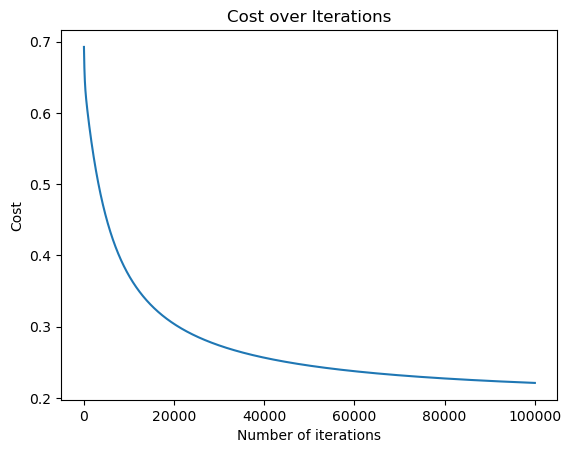

In [15]:
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')

plt.plot(cost_values)
plt.show()

## e) Decision boundary

In [16]:
def decision_boundry(x, data, theta):
    
    w = np.reshape(theta, -1)
    
    x_values = [np.min(x[:, 1]), np.max(x[:, 2])]
    y_values = - (w[0] + np.dot(w[1], x_values)) / w[2]
    
    admitted = data[data['admitted'] == 1]
    not_admitted = data[data['admitted'] == 0]

    plt.scatter(admitted['exam_1'], admitted['exam_2'], c='green')
    plt.scatter(not_admitted['exam_1'], not_admitted['exam_2'], c='red')

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('First exam score')
    plt.ylabel('Second exam score')
    plt.legend()
    plt.show()


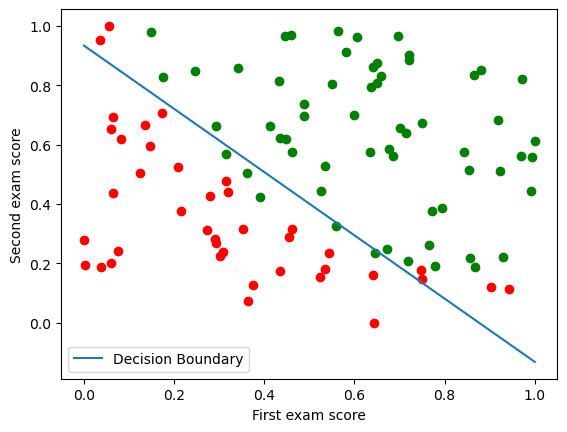

In [17]:
decision_boundry(x, df, wj)

## f) Predictions

In [18]:
def predict(x, theta):
    probs = sigmoid(np.dot(x, theta))
    return (probs >= 0.5).astype(int)

In [19]:
def calculate_accuracy(x, y, theta):
    y_pred = predict(x, theta)
    y_pred = y_pred.flatten()
    accuracy = np.mean(y_pred == y.flatten())
    
    return accuracy * 100


In [20]:
print(f"The accuracy is: {calculate_accuracy(x, y, wj)}%")

The accuracy is: 89.0%


In [21]:
x = df[['exam_1', 'exam_2']].values  
y = df['admitted'].values 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

df1 = pd.DataFrame(x_scaled, columns=['exam_1', 'exam_2'])
df1['admitted'] = y

In [22]:
test_1_normalized = scaler.transform([[55, 70]])
test_2_normalized = scaler.transform([[40, 60]])

# Prepare the test data points by adding the intercept term
test_1_prep = np.concatenate(([1], test_1_normalized.flatten()))
test_2_prep = np.concatenate(([1], test_2_normalized.flatten()))

# Make predictions using your model
result1 = predict(test_1_prep, wj)
result2 = predict(test_2_prep, wj)

print("\nPredicted Admission Outcomes:")
print("----------------------------")
print(f"For scores [55, 70]: {'Admitted' if result1 == 1 else 'Not Admitted'}")
print(f"For scores [40, 60]: {'Admitted' if result2 == 1 else 'Not Admitted'}")


Predicted Admission Outcomes:
----------------------------
For scores [55, 70]: Admitted
For scores [40, 60]: Admitted


# Logistic regression using library

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

new_data_points = scaler.transform([[55, 70], [40, 60]])
new_predictions = model.predict(new_data_points)

print(f"Predicted labels for the new data points: {new_predictions}")

Accuracy on the test set: 85.00%
Predicted labels for the new data points: [1 1]
